In [113]:
import numpy as np
import pandas as pd
import warnings
import riskfolio as rp
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [114]:
acwi_tbsc = pd.read_excel('./acwi_tbsc.xlsx', sheet_name='2011-2021')
acwi_tbsc

,ACWI,TBSC
0,0.2500%,1.2600%
1,-5.5900%,0.4900%
2,3.7000%,1.1300%
3,5.6800%,-0.3800%
4,4.3100%,1.1000%
...,...,...
115,2.5000%,0.2600%
116,8.8200%,-1.1800%
117,-0.2800%,-0.0200%
118,-1.1400%,-0.2300%


In [115]:
port = rp.Portfolio(returns=acwi_tbsc)

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

points = 50 # Number of points of the frontier
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.07 # Risk free rate

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head(20))

,ACWI,TBSC
0,4.7230%,95.2770%
1,13.3645%,86.6355%
2,17.1310%,82.8690%
3,20.1452%,79.8548%
4,22.7880%,77.2120%
5,25.2034%,74.7966%
6,27.4641%,72.5359%
7,29.6123%,70.3877%
8,31.6748%,68.3252%
9,33.6702%,66.3298%


In [116]:
obj = 'Sharpe'
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, hist=hist)

display(w)

The problem doesn't have a solution with actual input parameters


None

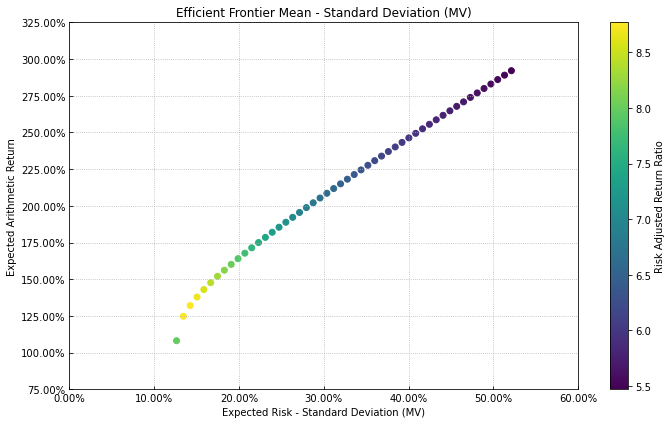

In [117]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets



ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

fig = ax.get_figure()
fig.savefig('frontier.jpg')



In [121]:

np.exp(6)

403.4287934927351